<a href="https://colab.research.google.com/github/SauleRub/DI_Bootcamp/blob/main/Week8/Day4/Week8Day4_DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Data Science Job Salaries.zip to Data Science Job Salaries.zip


In [3]:
import zipfile

zip_path = "Data Science Job Salaries.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("salary_data")

In [4]:
import os
print(os.listdir("salary_data"))

['ds_salaries.csv']


In [5]:
import pandas as pd

df = pd.read_csv("salary_data/ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
df = df.drop(columns=["Unnamed: 0"])

print("Missing values:\n", df.isnull().sum())

print("Duplicate rows:", df.duplicated().sum())

df = df.drop_duplicates()

Missing values:
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Duplicate rows: 42


In [7]:
grouped = df.groupby("experience_level")["salary_in_usd"].agg(["mean", "median"]).reset_index()
print(grouped)

  experience_level           mean    median
0               EN   61643.318182   56500.0
1               EX  199392.038462  171437.5
2               MI   87792.995192   76940.0
3               SE  138374.880658  135000.0


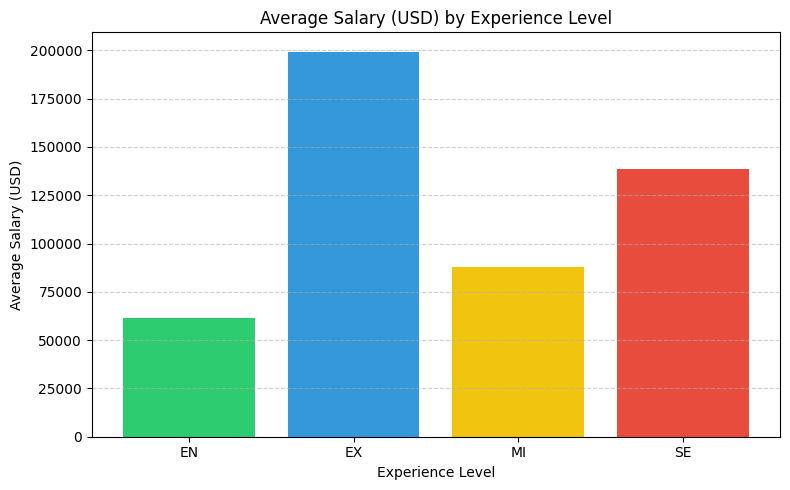

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(grouped["experience_level"], grouped["mean"], color=["#2ecc71", "#3498db", "#f1c40f", "#e74c3c"])
plt.title("Average Salary (USD) by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [12]:
grouped["experience_level"] = grouped["experience_level"].map({
    "EN": "Entry-Level",
    "MI": "Mid-Level",
    "SE": "Senior-Level",
    "EX": "Executive"
})

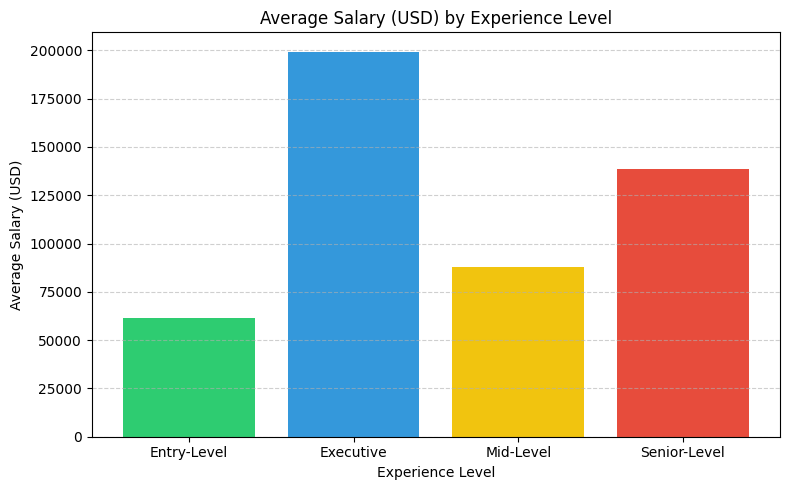

In [13]:
plt.figure(figsize=(8, 5))
plt.bar(grouped["experience_level"], grouped["mean"], color=["#2ecc71", "#3498db", "#f1c40f", "#e74c3c"])
plt.title("Average Salary (USD) by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()